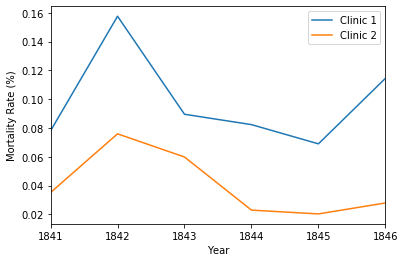

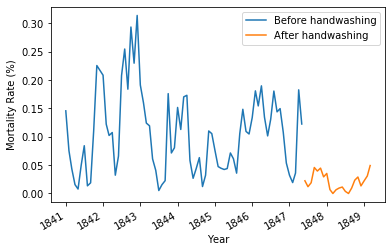

before hand washing: 10.5 percent
after hand washing: 2.1 percent
difference: -8.4 percent
95% confidence interval is between -6.8% and -10.1%


In [1]:
"""
A script for scraping and cleaning two websites for data which is
used for a comparative analysis.
"""

import pandas as pd
import scrape_wikipedia_for_table as scrape
import matplotlib.pyplot as plt

''' Scrape and clean yearly data from Wikipedia '''

# Call function to scrape website and get html
website = scrape.scraper('https://en.wikipedia.org/wiki/Ignaz_Semmelweis')

# Find 'wikitable' class and 'tr' tag in html
scraped_list = website.scrape('wikitable', 'tr')

# Put table data into dataframe
wrangled_list = scrape.wrangle_list(scraped_list)

# Remove trailing '/na' characters from dataframe elements
scrape.remove_line_breaks(wrangled_list)

# Remove ',' characters from elements in 'Births' column
scrape.remove_comma(wrangled_list['Births'])

# Change datatype of 'Year' column to date
wrangled_list['Year'] = wrangled_list['Year'].apply(pd.to_datetime)

# Change datatype of 'Births' and 'Deaths' columns to numeric
wrangled_list[['Births', 'Deaths']] = wrangled_list[['Births', 'Deaths']].apply(pd.to_numeric)

''' Scrape and clean monthly data from Wikipedia '''

# Call function to scrape website and get html
website2 = scrape.scraper('https://en.wikipedia.org/wiki/Historical_mortality_rates_of_puerperal_fever')

# Find 'wikitable sortable' class and 'tr' tag in html
scraped_list2 = website2.scrape('wikitable sortable', 'tr')

# Put table data into dataframe
wrangled_list2 = scrape.wrangle_list2(scraped_list2)

# Remove trailing '/na' characters from dataframe elements
scrape.remove_line_breaks(wrangled_list2)

# Remove row with missing data
wrangled_list2 = wrangled_list2[wrangled_list2['Births']!='na']

# Change datatype of 'Year' column to date 
wrangled_list2['Year'] = wrangled_list2['Year'].apply(pd.to_datetime)

# Change datatype of 'Births' and 'Deaths' columns to numeric
wrangled_list2[['Births', 'Deaths']] = wrangled_list2[['Births', 'Deaths']].apply(pd.to_numeric)   

# Reset index of dataframe
wrangled_list2.reset_index(drop=True, inplace = True)

# ''' Analyze yearly data '''

# Calculate mortality rate
wrangled_list['Mortality_Rate'] = wrangled_list['Deaths']/wrangled_list['Births']

# Put clinic 1 data and clinic 2 into seperate variables
yearly1 = wrangled_list[wrangled_list['Clinic']=='First']
yearly2 = wrangled_list[wrangled_list['Clinic']=='Second']

# Plot yearly mortality rates at the two clinics
plot1 = yearly1.plot(x='Year', y='Mortality_Rate', label='Clinic 1')
plot2 = yearly2.plot(x='Year', y='Mortality_Rate', label='Clinic 2', ax=plot1)
plot2.set_ylabel('Mortality Rate (%)')

''' Analyze monthly data '''

# Calculate proportion of deaths per no. births
wrangled_list2["Mortality_Rate"] = wrangled_list2["Deaths"]/wrangled_list2["Births"]

# Put date when handwashing was made mandatory into variable
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly data into before and after handwashing
before_washing = wrangled_list2[wrangled_list2["Year"]<handwashing_start]
after_washing = wrangled_list2[wrangled_list2["Year"]>=handwashing_start]

# Plot monthly mortality rate before and after handwashing
ax = before_washing.plot(x='Year', y='Mortality_Rate', label='Before handwashing') 
after_washing.plot(x='Year', y='Mortality_Rate', label='After handwashing', ax=ax)
ax.set_ylabel("Mortality Rate (%)")
plt.show()

# Find average mortility rate before and after
# handwashing and compute difference
before_proportion =before_washing["Mortality_Rate"]
after_proportion =after_washing["Mortality_Rate"]
mean_diff = after_proportion.mean()-before_proportion.mean()

print(f'before hand washing: {before_proportion.mean()*100:.1f} percent')
print(f'after hand washing: {after_proportion.mean()*100:.1f} percent')
print(f'difference: {mean_diff*100:.1f} percent')

# Create a sample distribution of the reduction 
# in mortality rates due to handwashing
mean_diff = []
for i in range(3000):
    before = before_proportion.sample(frac=1, replace=True)
    after = after_proportion.sample(frac=1, replace=True)
    mean_diff.append(after.mean() - before.mean())

# Calculating a 95% confidence interval from mean_diff 
confidence_interval = pd.Series(mean_diff).quantile([0.025, 0.975])   
print(f'95% confidence interval is between {confidence_interval[0.975]*100:.1f}%\
 and {confidence_interval[0.025]*100:.1f}%')